In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('datasets/lab_5.csv')
column_names = ['Y', 'X1', 'X2']
df = pd.read_csv('datasets/lab_5.csv', header=None, names=column_names)
df.head()

,Y,X1,X2
0,1.0,2.6487,4.5192
1,1.0,1.5438,2.4443
2,1.0,1.8990,4.2409
3,1.0,2.4711,5.8097
4,1.0,3.3590,6.4423


In [3]:
# train_val_split
X_train, X_val, y_train, y_val = train_test_split(df[['X1', 'X2']], df['Y'], test_size=0.2, random_state=42)

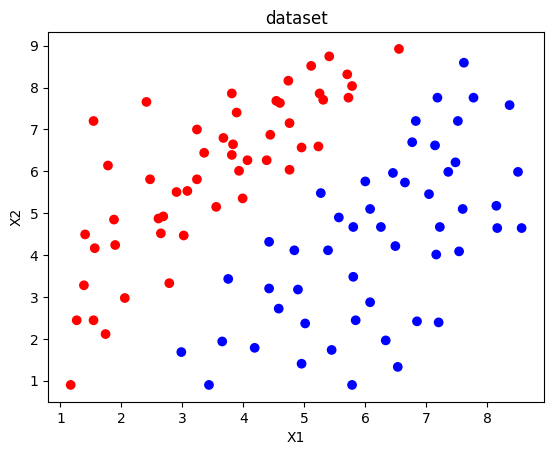

In [4]:
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset')
plt.show()

In [5]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, epochs=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [6]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, epochs=1000)
svm.fit(X_train.to_numpy(), y_train.to_numpy())
y_train_pred = svm.predict(X_train.to_numpy())
y_val_pred = svm.predict(X_val.to_numpy())

# these are the optimal parameters
svm.w, svm.b

(array([-1.41341734,  0.99390776]), np.float64(-1.4729999999999486))

In [7]:
# printing training and validation accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

train_acc, val_acc

(1.0, 1.0)

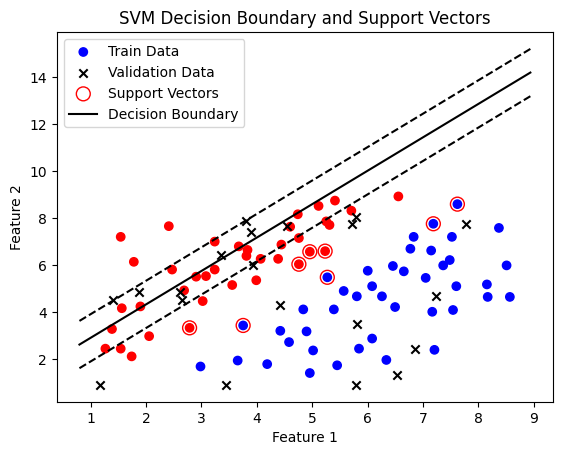

In [8]:
def plot_svm_simple(X_train, y_train, X_val, y_val, svm):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', label='Train Data')

    plt.scatter(X_val[:, 0], X_val[:, 1], c='black', marker='x', label='Validation Data')

    support_vectors = (y_train * (np.dot(X_train, svm.w) - svm.b)) <= 1
    plt.scatter(X_train[support_vectors, 0], X_train[support_vectors, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = -(svm.w[0] * xx + svm.b) / svm.w[1]


    plt.plot(xx, yy, 'k-', label='Decision Boundary')

    yy_margin_positive = -(svm.w[0] * xx + svm.b + 1) / svm.w[1]
    yy_margin_negative = -(svm.w[0] * xx + svm.b - 1) / svm.w[1]
    plt.plot(xx, yy_margin_positive, 'k--')
    plt.plot(xx, yy_margin_negative, 'k--')

    plt.title("SVM Decision Boundary and Support Vectors")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')
    plt.show()

plot_svm_simple(X_train.to_numpy(), y_train.to_numpy(), X_val.to_numpy(), y_val.to_numpy(), svm)
